In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("./data/heart.csv")

In [21]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
x = df.drop("output", axis = 1).values
y = df.loc[:, "output"].values

In [25]:
x.shape

(303, 13)

In [26]:
y.shape

(303,)

In [27]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size=.3, shuffle=True, stratify=y, random_state=51)

In [28]:
dtclf = DecisionTreeClassifier(criterion="entropy", random_state=51, max_depth=3)

In [29]:
dtclf.fit(xtr, ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=51)

In [30]:
ypr = dtclf.predict(xts)

In [31]:
accuracy_score(yts, ypr)

0.7912087912087912

[Text(167.4, 190.26, 'cp <= 0.5\nentropy = 0.995\nsamples = 212\nvalue = [97, 115]\nclass = 1'),
 Text(83.7, 135.9, 'caa <= 0.5\nentropy = 0.84\nsamples = 104\nvalue = [76, 28]\nclass = 0'),
 Text(41.85, 81.53999999999999, 'thall <= 2.5\nentropy = 0.995\nsamples = 48\nvalue = [22, 26]\nclass = 1'),
 Text(20.925, 27.180000000000007, 'entropy = 0.797\nsamples = 29\nvalue = [7, 22]\nclass = 1'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.742\nsamples = 19\nvalue = [15, 4]\nclass = 0'),
 Text(125.55000000000001, 81.53999999999999, 'oldpeak <= 0.4\nentropy = 0.222\nsamples = 56\nvalue = [54, 2]\nclass = 0'),
 Text(104.625, 27.180000000000007, 'entropy = 0.592\nsamples = 14\nvalue = [12, 2]\nclass = 0'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]\nclass = 0'),
 Text(251.10000000000002, 135.9, 'thalachh <= 155.5\nentropy = 0.711\nsamples = 108\nvalue = [21, 87]\nclass = 1'),
 Text(209.25, 81.53999999999999, 'slp <= 0.5\nentropy = 0.962\nsa

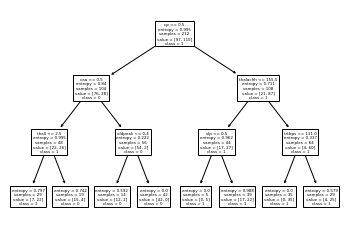

In [32]:
plot_tree(dtclf, feature_names=df.drop("output", axis = 1).columns, class_names="01")